# 机器学习实战之信用卡盗刷检测###

### 前言
本位将采样机器学习方法分析一个实际问题：信用卡盗刷，基于历史数据训练模型，得到一个能够对信用卡盗刷进行检测的模型，本文采样noteBook的形式记录整个分析过程，欢迎指正和相互学习。
### 1数据介绍
数据集来自Kaggle官网，数据集包含由欧洲持卡人于2013年9月使用信用卡进行交的数据。此数据集显示两天内发生的交易，其中284,807笔交易中有492笔被盗刷。数据集非常不平衡，被盗刷占所有交易的0.17％。

数据集一共31个特征，class为标签，1代表被盗刷，0代表正常交易。Time为时间特征，表示的是与第一笔交易的间隔时间，单位：s，Amount为交易的花费，除上述特征外，另有V1~V28，共28个经过数据处理的特征，出于信息保密，这些特征的具体含义无从知晓，但并不影响我们进行分析。下面就让我们来看看具体的数据。
#### 数据整体特征
拿到数据后，我们先来看看数据到底长啥样？

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
data = pd.read_csv('../ML_data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


从head可以看出：数据都是结构化数据。我们接下来对整个数据集的特征做一些展示：

In [3]:
data.shape

(284807, 31)

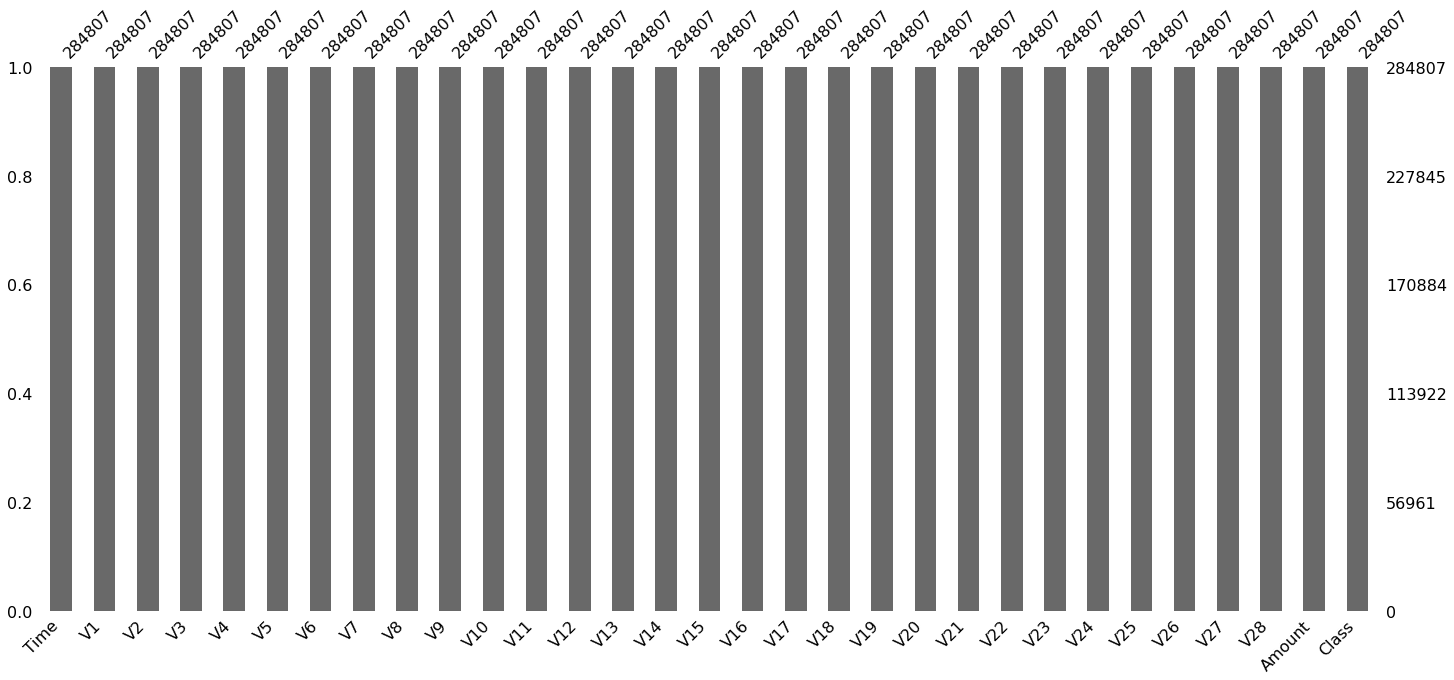

In [4]:
msno.bar(data)

从以上数据可以看出，总共有284807条数据，不存在缺失值。

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


观察数据，V1~V28特征的均值在0附近，方差在0.3~2，相比较而言，时间Time和Amount特征就差别较大，需要做特征缩放。
### 数据探索性分析
首先来看看正反样本分布情况

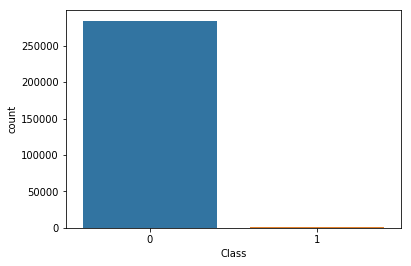

In [6]:
sns.countplot(x='Class',data=data)

In [7]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

数据存在明显的不均衡的情况。
特征之间相关性情况。

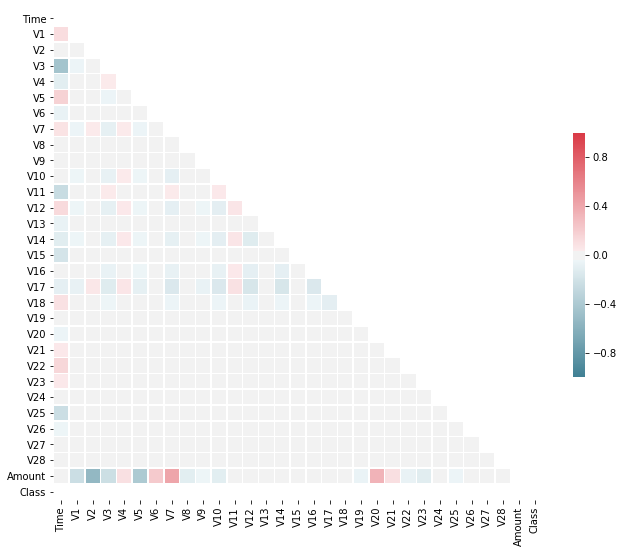

In [8]:
corr = data.loc[data["Class"]==0].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

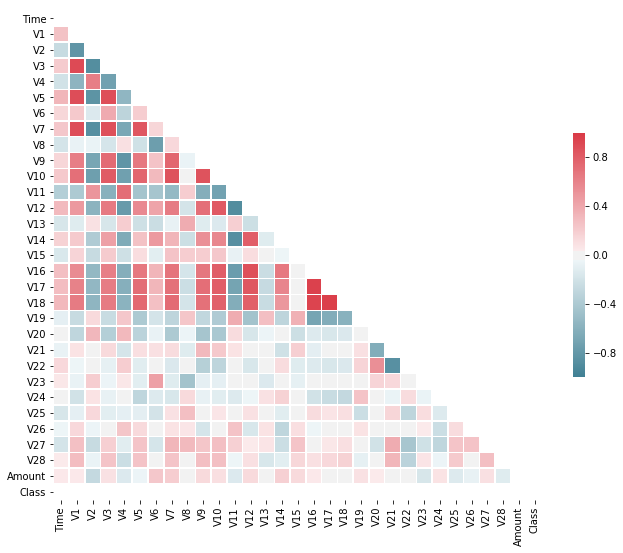

In [9]:
corr = data.loc[data["Class"]==1].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

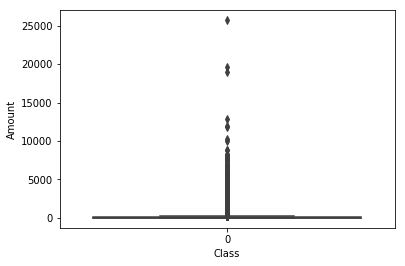

In [35]:
sns.boxplot( x='Class',y="Amount",data=data.loc[data["Class"]==0])